In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [2]:
# extracted from https://cricsheet.org/downloads/ipl_csv2.zip
df = pd.read_csv("all_matches.csv", dtype={"ball": str}, low_memory=False)
df.head()

match_id   season  start_date                  venue  innings ball  \
0    335982  2007/08  2008-04-18  M Chinnaswamy Stadium        1  0.1   
1    335982  2007/08  2008-04-18  M Chinnaswamy Stadium        1  0.2   
2    335982  2007/08  2008-04-18  M Chinnaswamy Stadium        1  0.3   
3    335982  2007/08  2008-04-18  M Chinnaswamy Stadium        1  0.4   
4    335982  2007/08  2008-04-18  M Chinnaswamy Stadium        1  0.5   

            batting_team                 bowling_team      striker  \
0  Kolkata Knight Riders  Royal Challengers Bangalore   SC Ganguly   
1  Kolkata Knight Riders  Royal Challengers Bangalore  BB McCullum   
2  Kolkata Knight Riders  Royal Challengers Bangalore  BB McCullum   
3  Kolkata Knight Riders  Royal Challengers Bangalore  BB McCullum   
4  Kolkata Knight Riders  Royal Challengers Bangalore  BB McCullum   

   non_striker  ... extras  wides  noballs  byes  legbyes  penalty  \
0  BB McCullum  ...      1    NaN      NaN   NaN      1.0      NaN   
1   SC Ganguly  ...      0    NaN      NaN   NaN      NaN      NaN   
2   SC Ganguly  ...      1    1.0      NaN   NaN      NaN      NaN   
3   SC Ganguly  ...      0    NaN      NaN   NaN      NaN      NaN   
4   SC Ganguly  ...      0    NaN      NaN   NaN      NaN      NaN   

   wicket_type  player_dismissed other_wicket_type other_player_dismissed  
0          NaN               NaN               NaN                    NaN  
1          NaN               NaN               NaN                    NaN  
2          NaN               NaN               NaN                    NaN  
3          NaN               NaN               NaN                    NaN  
4          NaN               NaN               NaN                    NaN  

[5 rows x 22 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208042 entries, 0 to 208041
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                208042 non-null  int64  
 1   season                  208042 non-null  object 
 2   start_date              208042 non-null  object 
 3   venue                   208042 non-null  object 
 4   innings                 208042 non-null  int64  
 5   ball                    208042 non-null  object 
 6   batting_team            208042 non-null  object 
 7   bowling_team            208042 non-null  object 
 8   striker                 208042 non-null  object 
 9   non_striker             208042 non-null  object 
 10  bowler                  208042 non-null  object 
 11  runs_off_bat            208042 non-null  int64  
 12  extras                  208042 non-null  int64  
 13  wides                   6324 non-null    float64
 14  noballs             

In [4]:
# merge teams which had name changes
name_changes = {
    "Deccan Chargers": "Sunrisers Hyderabad",
    "Delhi Daredevils": "Delhi Capitals",
    "Rising Pune Supergiants": "Rising Pune Supergiant",
    "Kings XI Punjab": "Punjab Kings",
}
df["batting_team"] = df["batting_team"].replace(name_changes)
df["bowling_team"] = df["bowling_team"].replace(name_changes)

In [5]:
# separate out over and ball
df[["over", "ball"]] = df["ball"].str.split(".", 1, expand=True).astype(int)
df

match_id   season  start_date                                venue  \
0         335982  2007/08  2008-04-18                M Chinnaswamy Stadium   
1         335982  2007/08  2008-04-18                M Chinnaswamy Stadium   
2         335982  2007/08  2008-04-18                M Chinnaswamy Stadium   
3         335982  2007/08  2008-04-18                M Chinnaswamy Stadium   
4         335982  2007/08  2008-04-18                M Chinnaswamy Stadium   
...          ...      ...         ...                                  ...   
208037   1254117     2021  2021-10-15  Dubai International Cricket Stadium   
208038   1254117     2021  2021-10-15  Dubai International Cricket Stadium   
208039   1254117     2021  2021-10-15  Dubai International Cricket Stadium   
208040   1254117     2021  2021-10-15  Dubai International Cricket Stadium   
208041   1254117     2021  2021-10-15  Dubai International Cricket Stadium   

        innings  ball           batting_team                 bowling_team  \
0             1     1  Kolkata Knight Riders  Royal Challengers Bangalore   
1             1     2  Kolkata Knight Riders  Royal Challengers Bangalore   
2             1     3  Kolkata Knight Riders  Royal Challengers Bangalore   
3             1     4  Kolkata Knight Riders  Royal Challengers Bangalore   
4             1     5  Kolkata Knight Riders  Royal Challengers Bangalore   
...         ...   ...                    ...                          ...   
208037        2     2  Kolkata Knight Riders          Chennai Super Kings   
208038        2     3  Kolkata Knight Riders          Chennai Super Kings   
208039        2     4  Kolkata Knight Riders          Chennai Super Kings   
208040        2     5  Kolkata Knight Riders          Chennai Super Kings   
208041        2     6  Kolkata Knight Riders          Chennai Super Kings   

            striker  non_striker  ... wides  noballs  byes  legbyes  penalty  \
0        SC Ganguly  BB McCullum  ...   NaN      NaN   NaN      1.0      NaN   
1       BB McCullum   SC Ganguly  ...   NaN      NaN   NaN      NaN      NaN   
2       BB McCullum   SC Ganguly  ...   1.0      NaN   NaN      NaN      NaN   
3       BB McCullum   SC Ganguly  ...   NaN      NaN   NaN      NaN      NaN   
4       BB McCullum   SC Ganguly  ...   NaN      NaN   NaN      NaN      NaN   
...             ...          ...  ...   ...      ...   ...      ...      ...   
208037  Shivam Mavi  LH Ferguson  ...   NaN      NaN   NaN      NaN      NaN   
208038  LH Ferguson  Shivam Mavi  ...   NaN      NaN   NaN      NaN      NaN   
208039  Shivam Mavi  LH Ferguson  ...   NaN      NaN   NaN      NaN      NaN   
208040  Shivam Mavi  LH Ferguson  ...   NaN      NaN   NaN      NaN      NaN   
208041  LH Ferguson     CV Varun  ...   NaN      NaN   NaN      NaN      NaN   

        wicket_type  player_dismissed  other_wicket_type  \
0               NaN               NaN                NaN   
1               NaN               NaN                NaN   
2               NaN               NaN                NaN   
3               NaN               NaN                NaN   
4               NaN               NaN                NaN   
...             ...               ...                ...   
208037          NaN               NaN                NaN   
208038          NaN               NaN                NaN   
208039          NaN               NaN                NaN   
208040       caught       Shivam Mavi                NaN   
208041          NaN               NaN                NaN   

       other_player_dismissed over  
0                         NaN    0  
1                         NaN    0  
2                         NaN    0  
3                         NaN    0  
4                         NaN    0  
...                       ...  ...  
208037                    NaN   19  
208038                    NaN   19  
208039                    NaN   19  
208040                    NaN   19  
208041                    NaN   19  

[208042 rows x 23 c

In [6]:
# separate match into powerplay (0-5 overs), middle overs (6-14 overs) and death overs (15-19 overs)
df["part"] = df["over"].apply(lambda x: 1 if x < 6 else (2 if x < 15 else 3))

# add column to count no of deliveries
df["deliveries"] = 1

# total runs made on a delivery
df["runs"] = df["runs_off_bat"] + df["extras"]

# count no of wickets
df["wickets"] = df["wicket_type"].notnull().astype(int)

df

match_id   season  start_date                                venue  \
0         335982  2007/08  2008-04-18                M Chinnaswamy Stadium   
1         335982  2007/08  2008-04-18                M Chinnaswamy Stadium   
2         335982  2007/08  2008-04-18                M Chinnaswamy Stadium   
3         335982  2007/08  2008-04-18                M Chinnaswamy Stadium   
4         335982  2007/08  2008-04-18                M Chinnaswamy Stadium   
...          ...      ...         ...                                  ...   
208037   1254117     2021  2021-10-15  Dubai International Cricket Stadium   
208038   1254117     2021  2021-10-15  Dubai International Cricket Stadium   
208039   1254117     2021  2021-10-15  Dubai International Cricket Stadium   
208040   1254117     2021  2021-10-15  Dubai International Cricket Stadium   
208041   1254117     2021  2021-10-15  Dubai International Cricket Stadium   

        innings  ball           batting_team                 bowling_team  \
0             1     1  Kolkata Knight Riders  Royal Challengers Bangalore   
1             1     2  Kolkata Knight Riders  Royal Challengers Bangalore   
2             1     3  Kolkata Knight Riders  Royal Challengers Bangalore   
3             1     4  Kolkata Knight Riders  Royal Challengers Bangalore   
4             1     5  Kolkata Knight Riders  Royal Challengers Bangalore   
...         ...   ...                    ...                          ...   
208037        2     2  Kolkata Knight Riders          Chennai Super Kings   
208038        2     3  Kolkata Knight Riders          Chennai Super Kings   
208039        2     4  Kolkata Knight Riders          Chennai Super Kings   
208040        2     5  Kolkata Knight Riders          Chennai Super Kings   
208041        2     6  Kolkata Knight Riders          Chennai Super Kings   

            striker  non_striker  ... penalty  wicket_type  player_dismissed  \
0        SC Ganguly  BB McCullum  ...     NaN          NaN               NaN   
1       BB McCullum   SC Ganguly  ...     NaN          NaN               NaN   
2       BB McCullum   SC Ganguly  ...     NaN          NaN               NaN   
3       BB McCullum   SC Ganguly  ...     NaN          NaN               NaN   
4       BB McCullum   SC Ganguly  ...     NaN          NaN               NaN   
...             ...          ...  ...     ...          ...               ...   
208037  Shivam Mavi  LH Ferguson  ...     NaN          NaN               NaN   
208038  LH Ferguson  Shivam Mavi  ...     NaN          NaN               NaN   
208039  Shivam Mavi  LH Ferguson  ...     NaN          NaN               NaN   
208040  Shivam Mavi  LH Ferguson  ...     NaN       caught       Shivam Mavi   
208041  LH Ferguson     CV Varun  ...     NaN          NaN               NaN   

        other_wicket_type  other_player_dismissed  over  part  deliveries  \
0                     NaN                     NaN     0     1           1   
1                     NaN                     NaN     0     1           1   
2                     NaN                     NaN     0     1           1   
3                     NaN                     NaN     0     1           1   
4                     NaN                     NaN     0     1           1   
...                   ...                     ...   ...   ...         ...   
208037                NaN                     NaN    19     3           1   
208038                NaN                     NaN    19     3           1   
208039                NaN                     NaN    19     3           1   
208040                NaN                     NaN    19     3           1   
208041                NaN                     NaN    19     3           1   

       runs wickets  
0         1       0  
1         0       0  
2         1       0  
3         0       0  
4         0       0  
...     ...     ...  
208037    1       0  
208038    1       0  
208039    0       0  
208040    0       1  
208041    1       

In [7]:
# grouped by parts
gdf = df.groupby(["match_id", "season", "innings", "batting_team", "bowling_team", "part"])[["runs", "deliveries", "wickets"]].sum().reset_index()
gdf["overs"] = gdf["deliveries"] / 6
gdf["run_rate"] = gdf["runs"] / gdf["overs"]

gdf

match_id   season  innings                 batting_team  \
0       335982  2007/08        1        Kolkata Knight Riders   
1       335982  2007/08        1        Kolkata Knight Riders   
2       335982  2007/08        1        Kolkata Knight Riders   
3       335982  2007/08        2  Royal Challengers Bangalore   
4       335982  2007/08        2  Royal Challengers Bangalore   
...        ...      ...      ...                          ...   
5172   1254117     2021        1          Chennai Super Kings   
5173   1254117     2021        1          Chennai Super Kings   
5174   1254117     2021        2        Kolkata Knight Riders   
5175   1254117     2021        2        Kolkata Knight Riders   
5176   1254117     2021        2        Kolkata Knight Riders   

                     bowling_team  part  runs  deliveries  wickets      overs  \
0     Royal Challengers Bangalore     1    61          38        1   6.333333   
1     Royal Challengers Bangalore     2    93          56        1   9.333333   
2     Royal Challengers Bangalore     3    68          30        1   5.000000   
3           Kolkata Knight Riders     1    26          38        4   6.333333   
4           Kolkata Knight Riders     2    55          61        5  10.166667   
...                           ...   ...   ...         ...      ...        ...   
5172        Kolkata Knight Riders     2    81          56        2   9.333333   
5173        Kolkata Knight Riders     3    61          31        1   5.166667   
5174          Chennai Super Kings     1    55          38        0   6.333333   
5175          Chennai Super Kings     2    65          57        6   9.500000   
5176          Chennai Super Kings     3    45          34        3   5.666667   

       run_rate  
0      9.631579  
1      9.964286  
2     13.600000  
3      4.105263  
4      5.409836  
...         ...  
5172   8.678571  
5173  11.806452  
5174   8.684211  
5175   6.842105  
5176   7.941176  

[5177 rows x 11 columns]

In [8]:
# grouped by overall innings
odf = df.groupby(["match_id", "season", "innings", "batting_team", "bowling_team"])[["runs", "deliveries", "wickets"]].sum().reset_index()
odf["overs"] = odf["deliveries"] / 6
odf["run_rate"] = odf["runs"] / odf["overs"]
odf

match_id   season  innings                 batting_team  \
0       335982  2007/08        1        Kolkata Knight Riders   
1       335982  2007/08        2  Royal Challengers Bangalore   
2       335983  2007/08        1          Chennai Super Kings   
3       335983  2007/08        2                 Punjab Kings   
4       335984  2007/08        1             Rajasthan Royals   
...        ...      ...      ...                          ...   
1775   1254115     2021        2        Kolkata Knight Riders   
1776   1254116     2021        1               Delhi Capitals   
1777   1254116     2021        2        Kolkata Knight Riders   
1778   1254117     2021        1          Chennai Super Kings   
1779   1254117     2021        2        Kolkata Knight Riders   

                     bowling_team  runs  deliveries  wickets      overs  \
0     Royal Challengers Bangalore   222         124        3  20.666667   
1           Kolkata Knight Riders    82         101       10  16.833333   
2                    Punjab Kings   240         124        5  20.666667   
3             Chennai Super Kings   207         124        4  20.666667   
4                  Delhi Capitals   129         122        8  20.333333   
...                           ...   ...         ...      ...        ...   
1775  Royal Challengers Bangalore   139         121        6  20.166667   
1776        Kolkata Knight Riders   135         124        5  20.666667   
1777               Delhi Capitals   136         124        7  20.666667   
1778        Kolkata Knight Riders   192         124        3  20.666667   
1779          Chennai Super Kings   165         129        9  21.500000   

       run_rate  
0     10.741935  
1      4.871287  
2     11.612903  
3     10.016129  
4      6.344262  
...         ...  
1775   6.892562  
1776   6.532258  
1777   6.580645  
1778   9.290323  
1779   7.674419  

[1780 rows x 10 columns]

# powerplay/middle/death over run rate vs overall runrate

In [9]:
# t-test to compare means of powerplay run-rate and overall run-rate
powerplay_overs = gdf[gdf["part"] == 1]
stats.ttest_rel(powerplay_overs["run_rate"], odf["run_rate"]).pvalue

8.17020523988067e-38

In [10]:
# average powerplay and overall run rates
np.mean(powerplay_overs["run_rate"]), np.mean(odf["run_rate"])

(7.420602280731893, 7.900076989420814)

In [11]:
# t-test to compare means of middle overs run-rate and overall run-rate
middle_overs = gdf[gdf["part"] == 2]

# keep only those matches and innings for which middle overs exist
odf2 = pd.merge(odf, middle_overs[["match_id", "innings"]], how="inner")

stats.ttest_rel(middle_overs["run_rate"], odf2["run_rate"]).pvalue

1.7128831953325014e-52

In [12]:
# average middle over and overall run rate
np.mean(middle_overs["run_rate"]), np.mean(odf2["run_rate"])

(7.427738066787074, 7.837738550101833)

In [13]:
# t-test to compare means of death overs run-rate and overall run-rate
death_overs = gdf[gdf["part"] == 3]

# keep only those matches and innings for which death overs exist
odf3 = pd.merge(odf, death_overs[["match_id", "innings"]], how="inner")

stats.ttest_rel(death_overs["run_rate"], odf3["run_rate"]).pvalue

1.682373175677881e-132

In [14]:
# average death over and overall run rate
np.mean(death_overs["run_rate"]), np.mean(odf3["run_rate"])

(9.308291516796636, 7.803483976081869)

# powerplay vs middle

In [15]:
stats.ttest_rel(middle_overs["run_rate"], pd.merge(powerplay_overs, middle_overs[["match_id", "innings"]], how="inner")["run_rate"])

Ttest_relResult(statistic=1.4658544184183016, pvalue=0.14286873694012528)

# powerplay vs death

In [16]:
stats.ttest_rel(death_overs["run_rate"], pd.merge(powerplay_overs, death_overs[["match_id", "innings"]], how="inner")["run_rate"])

Ttest_relResult(statistic=24.95982936719876, pvalue=5.546593022089546e-117)

# middle vs death

In [17]:
stats.ttest_rel(death_overs["run_rate"], pd.merge(middle_overs, death_overs[["match_id", "innings"]], how="inner")["run_rate"])

Ttest_relResult(statistic=26.96609225399189, pvalue=4.436960440435631e-133)

# powerplay/middle/death over run rate vs overall runrate (per team)

In [18]:
# teams which no longer play - will ignore them in team wise stats
defunct_teams = ["Gujarat Lions", "Kochi Tuskers Kerala", "Pune Warriors", "Rising Pune Supergiant"]
teams = sorted([t for t in df["batting_team"].unique() if t not in defunct_teams])

In [19]:
# is powerplay run-rate significantly different from overall run-rate for each team?
# for most teams, powerplay run-rate was SIGNIFICANTLY different (at significance level of 0.01)
# from overall run-rate except for Sunrisers Hyderabad

team_pvalue = pd.DataFrame({"team": teams,
                            "pvalue": [stats.ttest_rel(powerplay_overs[powerplay_overs["batting_team"] == team]["run_rate"],
                                                       odf[odf["batting_team"] == team]["run_rate"]).pvalue
                                       for team in teams]})
team_pvalue

team        pvalue
0          Chennai Super Kings  3.222764e-08
1               Delhi Capitals  1.448645e-04
2        Kolkata Knight Riders  1.782666e-04
3               Mumbai Indians  1.953278e-10
4                 Punjab Kings  1.205383e-05
5             Rajasthan Royals  6.066505e-06
6  Royal Challengers Bangalore  1.352397e-10
7          Sunrisers Hyderabad  5.173081e-02

In [20]:
for team in teams:
    print(team, np.mean(powerplay_overs[powerplay_overs["batting_team"] == team]["run_rate"]), np.mean(odf[odf["batting_team"] == team]["run_rate"]))

Chennai Super Kings 7.302905988571429 7.981940300015524
Delhi Capitals 7.454814754614853 7.821180493907139
Kolkata Knight Riders 7.439042255318514 7.850707090452683
Mumbai Indians 7.3263819636247876 7.978491816290162
Punjab Kings 7.572873028931887 8.058228189721838
Rajasthan Royals 7.387157386039042 7.91027306852797
Royal Challengers Bangalore 7.291822866762394 8.055352985697189
Sunrisers Hyderabad 7.561162798965008 7.76565828410289


In [21]:
team_pvalue = pd.DataFrame({"team": teams,
                            "pvalue": [stats.ttest_rel(middle_overs[middle_overs["batting_team"] == team]["run_rate"],
                                                       odf2[odf2["batting_team"] == team]["run_rate"]).pvalue
                                       for team in teams]})
team_pvalue

team        pvalue
0          Chennai Super Kings  7.794305e-11
1               Delhi Capitals  1.577820e-07
2        Kolkata Knight Riders  1.771213e-07
3               Mumbai Indians  3.096527e-08
4                 Punjab Kings  6.613496e-04
5             Rajasthan Royals  9.616722e-03
6  Royal Challengers Bangalore  1.327397e-08
7          Sunrisers Hyderabad  2.592153e-10

In [22]:
for team in teams:
    print(team, np.mean(middle_overs[middle_overs["batting_team"] == team]["run_rate"]), np.mean(odf2[odf2["batting_team"] == team]["run_rate"]))

Chennai Super Kings 7.462977370838648 7.967414219087768
Delhi Capitals 7.369158156125031 7.779461038299991
Kolkata Knight Riders 7.393760198205613 7.811438826846269
Mumbai Indians 7.439318921359977 7.912214542181261
Punjab Kings 7.703238249652587 7.9647673960525545
Rajasthan Royals 7.533685805183544 7.750394989187577
Royal Challengers Bangalore 7.512339796961874 7.957693559931799
Sunrisers Hyderabad 7.2476140650508905 7.717948068431464


In [23]:
team_pvalue = pd.DataFrame({"team": teams,
                            "pvalue": [stats.ttest_rel(death_overs[death_overs["batting_team"] == team]["run_rate"],
                                                       odf3[odf3["batting_team"] == team]["run_rate"]).pvalue
                                       for team in teams]})
team_pvalue

team        pvalue
0          Chennai Super Kings  1.597480e-25
1               Delhi Capitals  3.687873e-12
2        Kolkata Knight Riders  3.742213e-17
3               Mumbai Indians  2.186759e-24
4                 Punjab Kings  8.967374e-14
5             Rajasthan Royals  7.299891e-10
6  Royal Challengers Bangalore  2.733822e-27
7          Sunrisers Hyderabad  1.569216e-14

# plots of powerplay runrates per season

In [24]:
p1rr = powerplay_overs.groupby(["season", "batting_team"])[["runs", "deliveries"]].sum().reset_index()
p1rr["overs"] = p1rr["deliveries"] / 6
p1rr["run_rate"] = p1rr["runs"] / p1rr["overs"]
p1rr

season                 batting_team  runs  deliveries       overs  \
0    2007/08          Chennai Super Kings   722         615  102.500000   
1    2007/08               Delhi Capitals   712         525   87.500000   
2    2007/08        Kolkata Knight Riders   534         494   82.333333   
3    2007/08               Mumbai Indians   686         540   90.000000   
4    2007/08                 Punjab Kings   774         559   93.166667   
..       ...                          ...   ...         ...         ...   
111     2021               Mumbai Indians   676         518   86.333333   
112     2021                 Punjab Kings   595         521   86.833333   
113     2021             Rajasthan Royals   623         512   85.333333   
114     2021  Royal Challengers Bangalore   706         567   94.500000   
115     2021          Sunrisers Hyderabad   662         526   87.666667   

     run_rate  
0    7.043902  
1    8.137143  
2    6.485830  
3    7.622222  
4    8.307692  
..        ...  
111  7.830116  
112  6.852207  
113  7.300781  
114  7.470899  
115  7.551331  

[116 rows x 6 columns]

In [25]:
p2rr = middle_overs.groupby(["season", "batting_team"])[["runs", "deliveries"]].sum().reset_index()
p2rr["overs"] = p2rr["deliveries"] / 6
p2rr["run_rate"] = p2rr["runs"] / p2rr["overs"]
p2rr

season                 batting_team  runs  deliveries       overs  \
0    2007/08          Chennai Super Kings  1134         850  141.666667   
1    2007/08               Delhi Capitals   994         746  124.333333   
2    2007/08        Kolkata Knight Riders   823         729  121.500000   
3    2007/08               Mumbai Indians   898         725  120.833333   
4    2007/08                 Punjab Kings  1088         790  131.666667   
..       ...                          ...   ...         ...         ...   
111     2021               Mumbai Indians   901         741  123.500000   
112     2021                 Punjab Kings   994         766  127.666667   
113     2021             Rajasthan Royals   996         790  131.666667   
114     2021  Royal Challengers Bangalore   959         835  139.166667   
115     2021          Sunrisers Hyderabad   858         781  130.166667   

     run_rate  
0    8.004706  
1    7.994638  
2    6.773663  
3    7.431724  
4    8.263291  
..        ...  
111  7.295547  
112  7.785901  
113  7.564557  
114  6.891018  
115  6.591549  

[116 rows x 6 columns]

In [26]:
p3rr = death_overs.groupby(["season", "batting_team"])[["runs", "deliveries"]].sum().reset_index()
p3rr["overs"] = p3rr["deliveries"] / 6
p3rr["run_rate"] = p3rr["runs"] / p3rr["overs"]
p3rr

season                 batting_team  runs  deliveries      overs  \
0    2007/08          Chennai Super Kings   664         409  68.166667   
1    2007/08               Delhi Capitals   412         276  46.000000   
2    2007/08        Kolkata Knight Riders   585         334  55.666667   
3    2007/08               Mumbai Indians   496         319  53.166667   
4    2007/08                 Punjab Kings   602         390  65.000000   
..       ...                          ...   ...         ...        ...   
111     2021               Mumbai Indians   540         382  63.666667   
112     2021                 Punjab Kings   561         389  64.833333   
113     2021             Rajasthan Royals   577         400  66.666667   
114     2021  Royal Challengers Bangalore   638         421  70.166667   
115     2021          Sunrisers Hyderabad   564         426  71.000000   

      run_rate  
0     9.740831  
1     8.956522  
2    10.508982  
3     9.329154  
4     9.261538  
..         ...  
111   8.481675  
112   8.652956  
113   8.655000  
114   9.092637  
115   7.943662  

[116 rows x 6 columns]

In [27]:
orr = df.groupby(["season", "batting_team"])[["runs", "deliveries"]].sum().reset_index()
orr["overs"] = orr["deliveries"] / 6
orr["run_rate"] = orr["runs"] / orr["overs"]
orr

season                 batting_team  runs  deliveries       overs  \
0    2007/08          Chennai Super Kings  2520        1874  312.333333   
1    2007/08               Delhi Capitals  2118        1547  257.833333   
2    2007/08        Kolkata Knight Riders  1942        1557  259.500000   
3    2007/08               Mumbai Indians  2080        1584  264.000000   
4    2007/08                 Punjab Kings  2464        1739  289.833333   
..       ...                          ...   ...         ...         ...   
111     2021               Mumbai Indians  2117        1641  273.500000   
112     2021                 Punjab Kings  2150        1676  279.333333   
113     2021             Rajasthan Royals  2196        1702  283.666667   
114     2021  Royal Challengers Bangalore  2303        1823  303.833333   
115     2021          Sunrisers Hyderabad  2084        1733  288.833333   

     run_rate  
0    8.068303  
1    8.214609  
2    7.483622  
3    7.878788  
4    8.501438  
..        ...  
111  7.740402  
112  7.696897  
113  7.741481  
114  7.579813  
115  7.215234  

[116 rows x 6 columns]

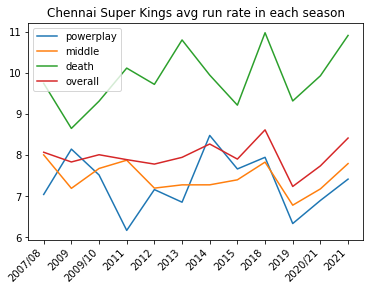

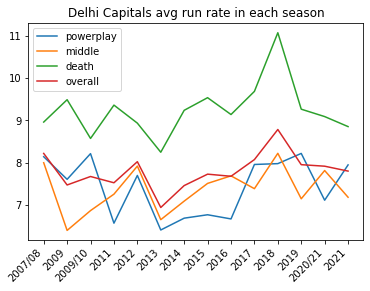

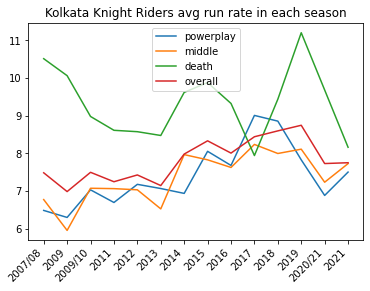

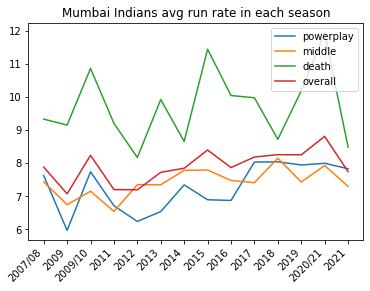

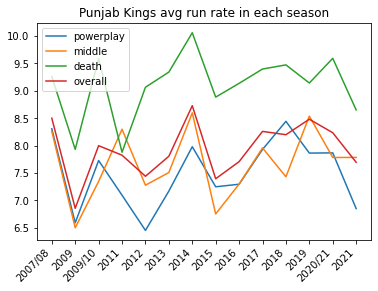

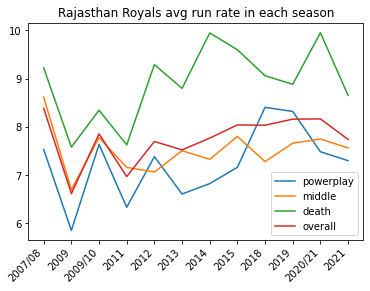

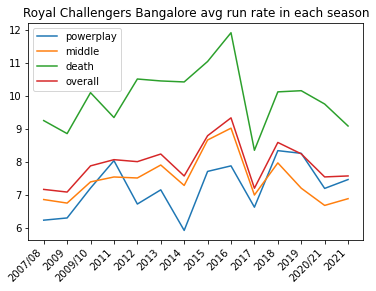

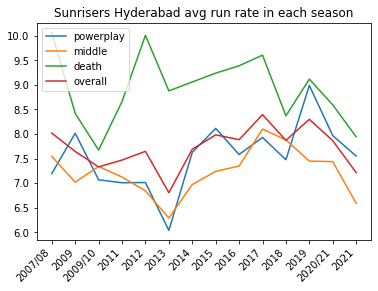

In [28]:
for team in teams:
    p1 = p1rr[p1rr["batting_team"] == team]
    p2 = p2rr[p2rr["batting_team"] == team]
    p3 = p3rr[p3rr["batting_team"] == team]
    ov = orr[orr["batting_team"] == team]
    _, ax = plt.subplots() #figsize=(8, 6))
    ax.set_title(f"{team} avg run rate in each season")
    plt.xticks(rotation=45, ha="right")
    plt.plot(p1["season"], p1["run_rate"], label="powerplay")
    plt.plot(p2["season"], p2["run_rate"], label="middle")
    plt.plot(p3["season"], p3["run_rate"], label="death")
    plt.plot(ov["season"], ov["run_rate"], label="overall")
    plt.legend()
    plt.savefig(f"{team}.png")

In [29]:
#_, ax = plt.subplots(figsize=(20, 15))
#g = sns.lineplot(x="season", y="run_rate", data=rr_df, hue="batting_team", style="batting_team", ax=ax,
#                 linestyle='', markers=True, dashes=False)

# orange and purple cap winners

In [30]:
# batsman who made most runs in a season wins orange cap
orange_caps = df.groupby(["season", "batting_team", "striker"])[["runs"]].sum().reset_index()
orange_caps = orange_caps.loc[orange_caps.groupby("season")["runs"].idxmax()].reset_index(drop=True)
orange_caps

season                 batting_team        striker  runs
0   2007/08                 Punjab Kings       SE Marsh   644
1      2009          Chennai Super Kings      ML Hayden   626
2   2009/10               Mumbai Indians   SR Tendulkar   665
3      2011  Royal Challengers Bangalore       CH Gayle   638
4      2012  Royal Challengers Bangalore       CH Gayle   762
5      2013  Royal Challengers Bangalore       CH Gayle   778
6      2014        Kolkata Knight Riders     RV Uthappa   681
7      2015          Sunrisers Hyderabad      DA Warner   589
8      2016  Royal Challengers Bangalore        V Kohli   998
9      2017          Sunrisers Hyderabad      DA Warner   670
10     2018          Sunrisers Hyderabad  KS Williamson   747
11     2019          Sunrisers Hyderabad      DA Warner   727
12  2020/21                 Punjab Kings       KL Rahul   696
13     2021          Chennai Super Kings     RD Gaikwad   658

In [31]:
# bowler who took most wickets in a season wins purple cap
purple_caps = df.groupby(["season", "bowling_team", "bowler"])[["wickets"]].sum().reset_index()
purple_caps = purple_caps.loc[purple_caps.groupby("season")["wickets"].idxmax()].reset_index(drop=True)
purple_caps

season                 bowling_team         bowler  wickets
0   2007/08             Rajasthan Royals  Sohail Tanvir       24
1      2009          Sunrisers Hyderabad       RP Singh       26
2   2009/10          Sunrisers Hyderabad        PP Ojha       22
3      2011               Mumbai Indians     SL Malinga       30
4      2012               Delhi Capitals       M Morkel       30
5      2013          Chennai Super Kings       DJ Bravo       34
6      2014          Chennai Super Kings      MM Sharma       26
7      2015          Chennai Super Kings       DJ Bravo       28
8      2016          Sunrisers Hyderabad        B Kumar       24
9      2017          Sunrisers Hyderabad        B Kumar       28
10     2018                 Punjab Kings         AJ Tye       28
11     2019               Delhi Capitals       K Rabada       29
12  2020/21               Delhi Capitals       K Rabada       32
13     2021  Royal Challengers Bangalore       HV Patel       35

# correlation between powerplay/middle/death overs run rates

In [32]:
# matrix with 3 rows having powerplay/middle/death over run rates
xyz = np.array([
    pd.merge(middle_overs[["match_id", "innings"]], pd.merge(powerplay_overs, death_overs[["match_id", "innings"]], how="inner"), how="inner")["run_rate"].to_numpy(),
    pd.merge(middle_overs, death_overs[["match_id", "innings"]], how="inner")["run_rate"].to_numpy(),
    pd.merge(death_overs, middle_overs[["match_id", "innings"]], how="inner")["run_rate"].to_numpy()])
xyz

array([[ 9.63157895,  4.10526316,  8.36842105, ...,  8.05263158,
         8.10810811,  8.68421053],
       [ 9.96428571,  5.40983607, 11.57142857, ...,  6.52631579,
         8.67857143,  6.84210526],
       [13.6       ,  3.        , 15.8       , ...,  4.75862069,
        11.80645161,  7.94117647]])

In [33]:
# pearson's correlation matrix
corr_matrix = np.corrcoef(xyz).round(decimals=2)
corr_matrix

array([[1.  , 0.16, 0.12],
       [0.16, 1.  , 0.28],
       [0.12, 0.28, 1.  ]])

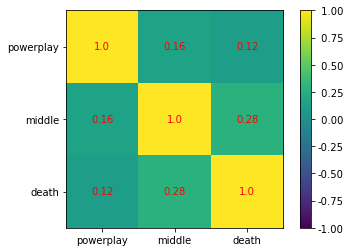

In [34]:
# plot the correlation matrix visually
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=("powerplay", "middle", "death"))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=("powerplay", "middle", "death"))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()

# Batsman Metrics

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208042 entries, 0 to 208041
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                208042 non-null  int64  
 1   season                  208042 non-null  object 
 2   start_date              208042 non-null  object 
 3   venue                   208042 non-null  object 
 4   innings                 208042 non-null  int64  
 5   ball                    208042 non-null  int64  
 6   batting_team            208042 non-null  object 
 7   bowling_team            208042 non-null  object 
 8   striker                 208042 non-null  object 
 9   non_striker             208042 non-null  object 
 10  bowler                  208042 non-null  object 
 11  runs_off_bat            208042 non-null  int64  
 12  extras                  208042 non-null  int64  
 13  wides                   6324 non-null    float64
 14  noballs             

In [36]:
runs4 = df['runs_off_bat'] == 4
total4runs = df[runs4].groupby('striker')[['runs']].sum()
total4runs

runs
striker             
A Ashish Reddy    64
A Chopra          28
A Choudhary        4
A Flintoff        20
A Kumble          12
...              ...
YK Pathan       1052
YV Takawale      104
Yashpal Singh     20
Yuvraj Singh     874
Z Khan            44

[442 rows x 1 columns]

In [37]:
runs6 = df['runs_off_bat'] == 6
total6runs = df[runs6].groupby('striker')[['runs']].sum()
total6runs

runs
striker             
A Ashish Reddy    90
A Choudhary        6
A Flintoff        12
A Mishra          30
A Mithun           6
...              ...
YBK Jaiswal       72
YK Pathan        966
YV Takawale       18
Yuvraj Singh     894
Z Khan            12

[367 rows x 1 columns]

In [38]:
totalruns = df.groupby('striker')[['runs']].sum()
totalruns

runs
striker             
A Ashish Reddy   288
A Chandila         4
A Chopra          58
A Choudhary       25
A Dananjaya        4
...              ...
YV Takawale      207
Yashpal Singh     49
Younis Khan        3
Yuvraj Singh    2884
Z Khan           121

[561 rows x 1 columns]

In [39]:
runs4and6 = total4runs.join(total6runs, how = 'outer', lsuffix='4', rsuffix='6')
runsall = runs4and6.join(totalruns, how = 'outer')
runsall['hard_hitting'] = (runsall['runs4'] + runsall['runs6'])/runsall['runs']
runsall = runsall.fillna(0)
runsall

runs4  runs6  runs  hard_hitting
striker                                         
A Ashish Reddy   64.0   90.0   288      0.534722
A Chandila        0.0    0.0     4      0.000000
A Chopra         28.0    0.0    58      0.000000
A Choudhary       4.0    6.0    25      0.400000
A Dananjaya       0.0    0.0     4      0.000000
...               ...    ...   ...           ...
YV Takawale     104.0   18.0   207      0.589372
Yashpal Singh    20.0    0.0    49      0.000000
Younis Khan       0.0    0.0     3      0.000000
Yuvraj Singh    874.0  894.0  2884      0.613037
Z Khan           44.0   12.0   121      0.462810

[561 rows x 4 columns]

# Furnishing Ability(non-striker?)

In [40]:
striker_dismissed = df[df['striker'] == df['player_dismissed']]
striker_dismissed_total_innings = striker_dismissed[['striker', 'player_dismissed']].groupby(['striker']).count()
striker_dismissed_total_innings

player_dismissed
striker                         
A Ashish Reddy                15
A Chopra                       5
A Choudhary                    1
A Flintoff                     2
A Kumble                       2
...                          ...
YV Takawale                    8
Yashpal Singh                  4
Younis Khan                    1
Yuvraj Singh                 107
Z Khan                        14

[523 rows x 1 columns]

In [41]:
innings_info = df.groupby(['striker','match_id','innings'])[[]].nunique()
innings_info_indexed = innings_info.reset_index()
total_innings = innings_info_indexed.groupby(['striker'])[['innings']].count()
total_innings

innings
striker                
A Ashish Reddy       23
A Chandila            2
A Chopra              6
A Choudhary           3
A Dananjaya           1
...                 ...
YV Takawale          10
Yashpal Singh         4
Younis Khan           1
Yuvraj Singh        127
Z Khan               27

[561 rows x 1 columns]

In [42]:
furnishingAbility = total_innings.join(striker_dismissed_total_innings, how = 'outer')
furnishingAbility = furnishingAbility.fillna(0)
furnishingAbility['furnishing_ability'] = (furnishingAbility['innings'] - furnishingAbility['player_dismissed'])/furnishingAbility['innings']
furnishingAbility

innings  player_dismissed  furnishing_ability
striker                                                      
A Ashish Reddy       23              15.0            0.347826
A Chandila            2               0.0            1.000000
A Chopra              6               5.0            0.166667
A Choudhary           3               1.0            0.666667
A Dananjaya           1               0.0            1.000000
...                 ...               ...                 ...
YV Takawale          10               8.0            0.200000
Yashpal Singh         4               4.0            0.000000
Younis Khan           1               1.0            0.000000
Yuvraj Singh        127             107.0            0.157480
Z Khan               27              14.0            0.481481

[561 rows x 3 columns]

# Consistency of Player

In [43]:
player_consistency = runsall.join(furnishingAbility, how='outer')[['runs', 'player_dismissed']]
player_consistency['consistency'] = player_consistency['runs']/player_consistency['player_dismissed']
player_consistency

runs  player_dismissed  consistency
striker                                            
A Ashish Reddy   288              15.0    19.200000
A Chandila         4               0.0          inf
A Chopra          58               5.0    11.600000
A Choudhary       25               1.0    25.000000
A Dananjaya        4               0.0          inf
...              ...               ...          ...
YV Takawale      207               8.0    25.875000
Yashpal Singh     49               4.0    12.250000
Younis Khan        3               1.0     3.000000
Yuvraj Singh    2884             107.0    26.953271
Z Khan           121              14.0     8.642857

[561 rows x 3 columns]

# Running b/w the wickets

In [44]:
total_balls_played = df.groupby('striker')[['match_id']].count()
total_balls_played = total_balls_played.rename(columns={'match_id': 'total_balls_played'})
total_balls_played

total_balls_played
striker                           
A Ashish Reddy                 196
A Chandila                       7
A Chopra                        75
A Choudhary                     20
A Dananjaya                      5
...                            ...
YV Takawale                    183
Yashpal Singh                   67
Younis Khan                      7
Yuvraj Singh                  2207
Z Khan                         141

[561 rows x 1 columns]

In [45]:
run_bw_wickets = runsall.drop(columns=['hard_hitting'])
run_bw_wickets = run_bw_wickets.join(total_balls_played, how='outer')
run_bw_wickets.fillna(0)
run_bw_wickets['runs-4-6'] = run_bw_wickets['runs'] - run_bw_wickets['runs4'] - run_bw_wickets['runs6']
run_bw_wickets['balls-4-6'] = run_bw_wickets['total_balls_played'] - (run_bw_wickets['runs4']/4) - (run_bw_wickets['runs6']/6)

run_bw_wickets['running_bw_wickets'] = run_bw_wickets['runs-4-6']/run_bw_wickets['balls-4-6']
run_bw_wickets

runs4  runs6  runs  total_balls_played  runs-4-6  balls-4-6  \
striker                                                                       
A Ashish Reddy   64.0   90.0   288                 196     134.0      165.0   
A Chandila        0.0    0.0     4                   7       4.0        7.0   
A Chopra         28.0    0.0    58                  75      30.0       68.0   
A Choudhary       4.0    6.0    25                  20      15.0       18.0   
A Dananjaya       0.0    0.0     4                   5       4.0        5.0   
...               ...    ...   ...                 ...       ...        ...   
YV Takawale     104.0   18.0   207                 183      85.0      154.0   
Yashpal Singh    20.0    0.0    49                  67      29.0       62.0   
Younis Khan       0.0    0.0     3                   7       3.0        7.0   
Yuvraj Singh    874.0  894.0  2884                2207    1116.0     1839.5   
Z Khan           44.0   12.0   121                 141      65.0      128.0   

                running_bw_wickets  
striker                             
A Ashish Reddy            0.812121  
A Chandila                0.571429  
A Chopra                  0.441176  
A Choudhary               0.833333  
A Dananjaya               0.800000  
...                            ...  
YV Takawale               0.551948  
Yashpal Singh             0.467742  
Younis Khan               0.428571  
Yuvraj Singh              0.606687  
Z Khan                    0.507812  

[561 rows x 7 columns]

In [46]:
run_bw_wickets_sort = run_bw_wickets.sort_values(by=['running_bw_wickets'])
run_bw_wickets_sort

runs4  runs6  runs  total_balls_played  runs-4-6  balls-4-6  \
striker                                                                       
S Lamichhane      0.0    0.0     0                   1       0.0        1.0   
Sunny Gupta       0.0    0.0     0                   1       0.0        1.0   
U Kaul            0.0    0.0     0                   1       0.0        1.0   
V Pratap Singh    0.0    0.0     0                   1       0.0        1.0   
C Nanda           0.0    0.0     0                   1       0.0        1.0   
...               ...    ...   ...                 ...       ...        ...   
TL Seifert        0.0    0.0     5                   5       5.0        5.0   
DNT Zoysa         4.0    0.0    13                   9       9.0        8.0   
A Nortje          0.0    0.0     7                   6       7.0        6.0   
Rasikh Salam      0.0    0.0     5                   4       5.0        4.0   
CRD Fernando      0.0    0.0     4                   3       4.0        3.0   

                running_bw_wickets  
striker                             
S Lamichhane              0.000000  
Sunny Gupta               0.000000  
U Kaul                    0.000000  
V Pratap Singh            0.000000  
C Nanda                   0.000000  
...                            ...  
TL Seifert                1.000000  
DNT Zoysa                 1.125000  
A Nortje                  1.166667  
Rasikh Salam              1.250000  
CRD Fernando              1.333333  

[561 rows x 7 columns]